<a href="https://colab.research.google.com/github/gopikasb/AIESI/blob/master/easyocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opencv-python==4.5.4.60

!pip install easyocr
import easyocr


     |████████████████████████████████| 63.6 MB 1.2 MB/s 
     |████████████████████████████████| 47.7 MB 1.5 MB/s 


In [3]:
#download the model
reader=easyocr.Reader(['en'],gpu=False)

Using CPU. Note: This module is much faster with a GPU.


Mounted at /content/gdrive


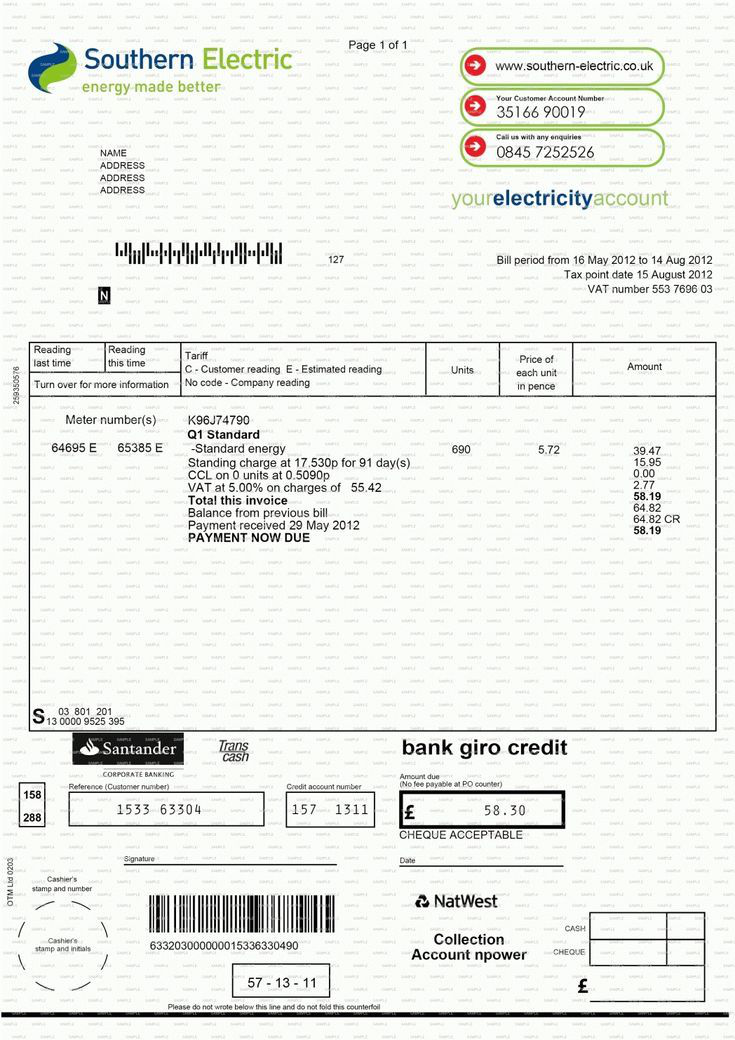

In [7]:
#show an image
import PIL
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import ImageDraw

from google.colab import drive
drive.mount('/content/gdrive')


im_1_path=PIL.Image.open('/content/gdrive/My Drive/Colab Notebooks/utilitybill.jpg')

im_1_path

In [8]:
#Doing OCR,Get Bounding boxes
reader = easyocr.Reader(['en'])
bounds=reader.readtext(im_1_path)
bounds

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[347, 39], [379, 39], [379, 53], [347, 53]], 'Page', 0.6937513639554842),
 ([[79, 43], [298, 43], [298, 75], [79, 75]],
  'Southern Electric',
  0.7958820009422511),
 ([[493, 57], [657, 57], [657, 75], [493, 75]],
  'www southern-electric co.uk',
  0.6579159032488787),
 ([[81, 79], [223, 79], [223, 99], [81, 99]],
  'energy made better',
  0.999646392376472),
 ([[493, 101], [589, 101], [589, 121], [493, 121]],
  '35166 90019',
  0.8549298716578484),
 ([[99, 147], [129, 147], [129, 159], [99, 159]], 'NAME', 0.48294851183891296),
 ([[493, 141], [597, 141], [597, 161], [493, 161]],
  '0845 7252526',
  0.7161323772074125),
 ([[99, 159], [147, 159], [147, 173], [99, 173]],
  'ADDRESS',
  0.8186321349858154),
 ([[99, 171], [147, 171], [147, 185], [99, 185]],
  'ADDRESS',
  0.7540660082439931),
 ([[99, 185], [147, 185], [147, 197], [99, 197]],
  'ADDRESS',
  0.696685546289176),
 ([[446, 182], [674, 182], [674, 212], [446, 212]],
  'yourelectricityaccount',
  0.920398594375338),
 ([[112, 24

In [9]:
import re
len(bounds)
for i in bounds:
    print(i[1])
    for row in i[1].split('\n'):    
        if row.startswith('Southern Electric'):
            head=row.split()[-1]

head

Page
Southern Electric
www southern-electric co.uk
energy made better
35166 90019
NAME
0845 7252526
ADDRESS
ADDRESS
ADDRESS
yourelectricityaccount
HHl|HHuY  H
Bill period from 16 May 2012 to 14 Aug 2012
Tax polni date 15 August 2012
VAT number 553
696 03
Reading
Reading
Tariff
Lastnme
tis time
Price 0t
Customer reading
Eslmaled reading
Units
each Mni
Amcint
Turn Over for more
Information
No ccde
Company reading
pence
Meter number(s)
K96J74790
01 Standard
64695
65385
~Standard energy
Standing charge at 17 530p for 91 day(s
CCL on
units at 0.5090p
VATat 5.00% on charges of
55,42
58 19
Total this invoice
Balance (rom previous bill
82 CR
Payment received 29 May 2012
58.19
PAYMENT Now DUE
80120
13 COCO 9525 395
Santander
Trns
bank giro credit
casn
cOR CAATE BAYKINc
C edi ncccun
Noles
1533 63304
157
1311
58 . 30
288
CHEQUE ACCEPTABLE
3mlg
inth +TE
NatWest
Cih
Crnk {4
633203000000015335330490
Collection
atinic und MaF
Account npower
CRECUE
57 - 13 -11


'Electric'

In [10]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: Page (Probability: 0.92)
Detected text: Southern Electric (Probability: 1.00)
Detected text: www southern-electric co.uk (Probability: 0.66)
Detected text: energy made better (Probability: 1.00)
Detected text: 35166 90019 (Probability: 0.88)
Detected text: 0845 7252526 (Probability: 0.98)
Detected text: ADDRESS (Probability: 0.81)
Detected text: ADDRESS (Probability: 0.75)
Detected text: ADDRESS (Probability: 0.74)
Detected text: yourelectricityaccount (Probability: 0.94)
Detected text: Bill period from 16 May 2012 to 14 Aug 2012 (Probability: 0.78)
Detected text: Tax polni date 15 August 2012 (Probability: 0.54)
Detected text: VAT number 553 (Probability: 0.72)
Detected text: 696 03 (Probability: 0.99)
Detected text: Reading (Probability: 1.00)
Detected text: Reading (Probability: 0.86)
Detected text: Tariff (Probability: 0.79)
Detected text: Customer reading (Probability: 0.98)
Detected text: Eslmaled reading (Probability: 0.86)
Detected text: Units (Probability: 1.00)

<Figure size 432x288 with 0 Axes>

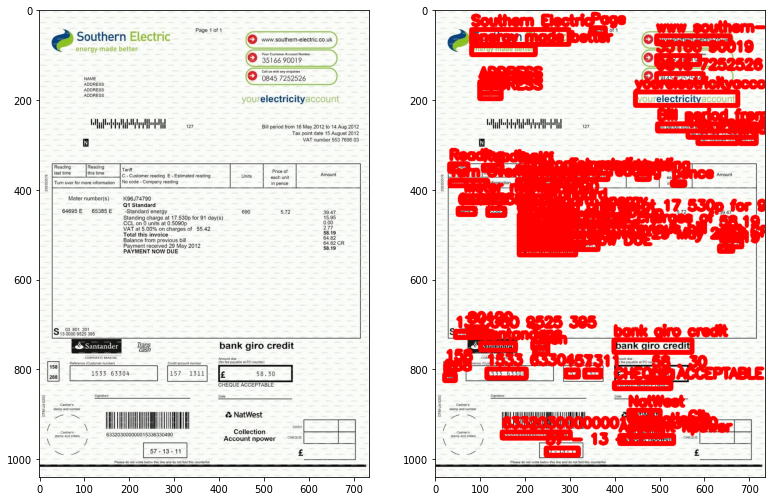

In [12]:
img_path='/content/gdrive/My Drive/Colab Notebooks/utilitybill.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img
dpi = 80
fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
plt.figure()
f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
axarr[0].imshow(img)

 # recognize text
result = recognize_text(img_path)
for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')
# get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))
            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)
# put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
     # show and save image
axarr[1].imshow(img)
#plt.savefig(f'./output/{save_name}_overlay.jpg', bbox_inches='tight')